In [1]:
import os
import tensorflow as tf
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import pandas as pd
from keras.utils import generic_utils

2022-10-10 13:44:29.427341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 13:44:29.532989: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-10 13:44:29.557337: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-10 13:44:30.028587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# Load Model

In [3]:
#load model
from tensorflow.keras.models import load_model

model_dir ='/media/tohn/SSD/ModelEfficientV2/USAI/ViewingAngle_model/fold1_2/R1/models/EffnetV2m_R1_ViewingAngle_fold1_2.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

2022-10-10 13:45:19.004953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 13:45:19.498280: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 154 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute capability: 7.5
2022-10-10 13:45:19.514286: I tensorflow/stream_executor/cuda/cuda_driver.cc:733] failed to allocate 154.44M (161939456 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2022-10-10 13:45:22.417926: I tensorflow/stream_executor/cuda/cuda_driver.cc:733] failed to allocate 15.44M (16193792 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2022-10-10 13:45

ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2]

In [4]:
model.summary()

NameError: name 'model' is not defined

# DATA

In [4]:
#Train
dataframe = pd.read_csv('/home/yupaporn/codes/USAI/Traindf_fold1_2_viewingAngle.csv')  #Traindf_fold1_2_viewingAngle.csv
dataframe = dataframe[dataframe['Sub_Position_New'] != 'None']
print(dataframe.shape)
dataframe.head()

#validation
#validation
valframe = pd.read_csv('/home/yupaporn/codes/USAI/Validationdf_fold1_2_viewingAngle.csv') #เปลี่ยนตาม fold
valframe = valframe[valframe['Sub_Position_New'] != 'None']
print(valframe.shape)
valframe.head()

DATA_PATH = "/media/tohn/SSD/Images/Image1"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
validation_dir = os.path.join(DATA_PATH, 'validation')
print(validation_dir)

(6682, 26)
(925, 24)
/media/tohn/SSD/Images/Image1/train
/media/tohn/SSD/Images/Image1/validation


In [5]:
valframe.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,...,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,Sub_Position_New
0,0,0,1,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,141.0,96.0,586.0,614.0,0.143898,0.107041,0.595628,0.683267,AB01 P1 C015.JPG,P1
1,1,1,2,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,242.0,101.0,491.0,451.0,0.245009,0.113017,0.497278,0.501992,AB01 P2 C015.JPG,P2
2,2,2,10,15,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,242.0,101.0,502.0,516.0,0.246118,0.113258,0.511070,0.573737,AB02 P2 C015.JPG,P2
3,3,3,11,15,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,257.0,103.0,538.0,634.0,0.256617,0.115278,0.537205,0.705051,AB02 P1 C015.JPG,P1
4,4,4,14,15,P2,P2,Abnormal,AB03,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,45.0,187.0,601.0,654.0,0.050314,0.196086,0.668817,0.682828,AB03 P2 C015.JPG,P2


In [6]:
#Setting data loader
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = valframe,
        directory = validation_dir,
        x_col = 'filename',
        y_col = 'Sub_Position_New',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 925 validated image filenames belonging to 12 classes.
{0: 'P1', 1: 'P10', 2: 'P11', 3: 'P13', 4: 'P14', 5: 'P16', 6: 'P2', 7: 'P3', 8: 'P4', 9: 'P5', 10: 'P6', 11: 'P8'}


## Predict Step

In [7]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    return result[0]

#Predict
pred_list = list()
prob_list = list()
img_path=valframe['Path Crop'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

2022-10-05 15:57:33.810560: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-10-05 15:57:34.159546: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 37ms/step


In [8]:
valframe['category_FP'] = pred_list
valframe['Prob_FP'] = prob_list
valframe

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,...,width,height,Rleft,Rtop,Rwidth,Rheight,filename,Sub_Position_New,category_FP,Prob_FP
0,0,0,1,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,586.0,614.0,0.143898,0.107041,0.595628,0.683267,AB01 P1 C015.JPG,P1,P3,0.458723
1,1,1,2,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,491.0,451.0,0.245009,0.113017,0.497278,0.501992,AB01 P2 C015.JPG,P2,P2,0.238811
2,2,2,10,15,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,502.0,516.0,0.246118,0.113258,0.511070,0.573737,AB02 P2 C015.JPG,P2,P10,0.354323
3,3,3,11,15,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,538.0,634.0,0.256617,0.115278,0.537205,0.705051,AB02 P1 C015.JPG,P1,P1,0.356360
4,4,4,14,15,P2,P2,Abnormal,AB03,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,601.0,654.0,0.050314,0.196086,0.668817,0.682828,AB03 P2 C015.JPG,P2,P2,0.311738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,970,970,558,252,P8,P8,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/USimages20...,/media/tohn/HDD/VISION_dataset/USAI/USimages20...,...,NaN,NaN,NaN,NaN,NaN,NaN,P8.Case 252.JPG,P16,P16,0.401411
971,971,971,543,288,P8,P8,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/USimages20...,/media/tohn/HDD/VISION_dataset/USAI/USimages20...,...,NaN,NaN,NaN,NaN,NaN,NaN,P8.Case 288.JPG,P16,P16,0.930502
972,972,972,598,307,P8,P8,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,...,NaN,NaN,NaN,NaN,NaN,NaN,P8.Case 307.JPG,P16,P16,0.902189
973,973,973,380,119,P8,P8,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,...,NaN,NaN,NaN,NaN,NaN,NaN,P8C119.jpg,P16,P16,0.976573


In [9]:
data_train = valframe
#เช็คคลาสใน Predicted
pred_class = sorted(set(data_train['category_FP']))
print('Predicted : ',len(pred_class))
print(pred_class)
print('-'*50)
#เช็คคลาสใน Actual
classe = sorted(set(data_train['Sub_Position_New']))
print('Actual : ',len(classe))
print(classe)

Predicted :  11
['P1', 'P10', 'P11', 'P13', 'P16', 'P2', 'P3', 'P4', 'P5', 'P6', 'P8']
--------------------------------------------------
Actual :  12
['P1', 'P10', 'P11', 'P13', 'P14', 'P16', 'P2', 'P3', 'P4', 'P5', 'P6', 'P8']


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = data_train['Sub_Position_New'].array
pred = data_train['category_FP'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 66.16216216216216%
              precision    recall  f1-score   support

          P1       0.55      0.47      0.51       100
         P10       0.76      0.68      0.72        99
         P11       0.60      0.78      0.68        96
         P13       0.72      0.63      0.67        62
         P14       0.00      0.00      0.00        21
         P16       0.72      1.00      0.84       195
          P2       0.69      0.56      0.62        89
          P3       0.52      0.68      0.59        66
          P4       0.58      0.54      0.56        46
          P5       0.57      0.51      0.54        53
          P6       0.85      0.65      0.73        62
          P8       0.25      0.06      0.09        36

    accuracy                           0.66       925
   macro avg       0.57      0.55      0.55       925
weighted avg       0.64      0.66      0.64       925



/home/kannika/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 21.249999999999993, 'Predicted label')

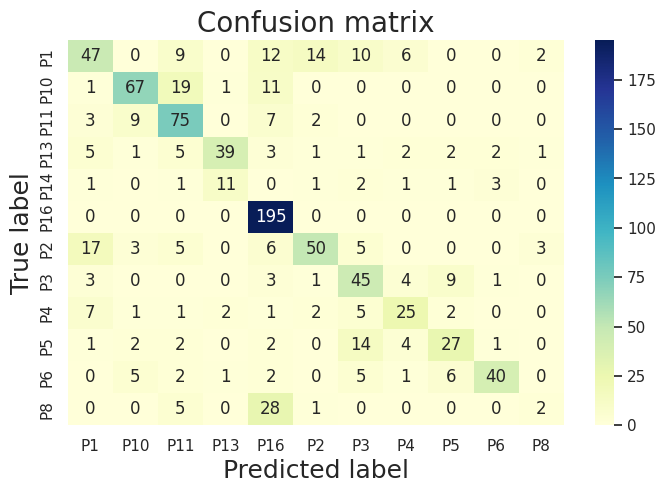

In [11]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)